### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
#loading libraries
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyverse)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [3]:
#Read data in R
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [4]:
#investigating the new_york_city data
head(ny)
dim(ny)
summary(ny)
names(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


[1] 54770     9

       X                         Start.Time                   End.Time    
 Min.   :     47   2017-05-11 18:26:10:    3   2017-01-03 08:54:10:    2  
 1st Qu.:1712425   2017-01-04 13:58:24:    2   2017-01-04 17:21:55:    2  
 Median :3418634   2017-01-09 09:36:01:    2   2017-01-05 17:25:17:    2  
 Mean   :3415873   2017-01-21 15:36:56:    2   2017-01-12 08:34:01:    2  
 3rd Qu.:5123382   2017-01-21 17:49:59:    2   2017-01-12 09:41:54:    2  
 Max.   :6816152   2017-01-21 20:08:29:    2   2017-01-12 20:34:42:    2  
                   (Other)            :54757   (Other)            :54758  
 Trip.Duration                     Start.Station  
 Min.   :     61.0   Pershing Square North:  592  
 1st Qu.:    368.0   W 21 St & 6 Ave      :  385  
 Median :    610.0   Broadway & E 22 St   :  383  
 Mean   :    903.6   E 17 St & Broadway   :  380  
 3rd Qu.:   1051.0   West St & Chambers St:  364  
 Max.   :1088634.0   W 20 St & 11 Ave     :  329  
 NA's   :1           (Other)              :

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [5]:
#investigating the washington_city data
head(wash)
dim(wash)
summary(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


[1] 89051     7

       X                         Start.Time                   End.Time    
 Min.   :      7   2017-02-19 12:19:00:    6   2017-03-09 17:54:00:    7  
 1st Qu.: 434587   2017-02-20 11:35:00:    6   2017-03-28 18:11:00:    7  
 Median : 872858   2017-02-24 17:46:00:    6   2017-01-13 17:48:00:    6  
 Mean   : 873881   2017-03-01 08:20:00:    6   2017-01-31 08:49:00:    6  
 3rd Qu.:1313305   2017-03-02 08:39:00:    6   2017-02-13 18:09:00:    6  
 Max.   :1751392   2017-03-09 17:31:00:    6   2017-02-20 11:38:00:    6  
                   (Other)            :89015   (Other)            :89013  
 Trip.Duration                                   Start.Station  
 Min.   :    60.3   Columbus Circle / Union Station     : 1700  
 1st Qu.:   410.9   Lincoln Memorial                    : 1546  
 Median :   707.0   Jefferson Dr & 14th St SW           : 1488  
 Mean   :  1234.0   Massachusetts Ave & Dupont Circle NW: 1219  
 3rd Qu.:  1233.2   Jefferson Memorial                  : 1068  
 Max.   :9

In [6]:
#investigating the chicago_city data
head(chi)
dim(chi)
summary(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


[1] 8630    9

       X                         Start.Time                  End.Time   
 Min.   :     36   2017-01-24 07:40:32:   2   2017-04-16 13:16:52:   2  
 1st Qu.: 386722   2017-04-22 13:16:25:   2   2017-04-26 16:29:26:   2  
 Median : 773554   2017-05-27 15:17:50:   2   2017-05-21 16:20:56:   2  
 Mean   : 776721   2017-06-10 13:29:41:   2   2017-05-27 09:58:21:   2  
 3rd Qu.:1171266   2017-06-20 17:05:11:   2   2017-06-25 14:51:35:   2  
 Max.   :1551248   2017-06-21 13:18:52:   2   2017-01-01 00:46:32:   1  
                   (Other)            :8618   (Other)            :8619  
 Trip.Duration                          Start.Station 
 Min.   :   60.0   Streeter Dr & Grand Ave     : 210  
 1st Qu.:  394.2   Lake Shore Dr & Monroe St   : 140  
 Median :  670.0   Clinton St & Washington Blvd: 120  
 Mean   :  937.2   Clinton St & Madison St     : 102  
 3rd Qu.: 1119.0   Canal St & Adams St         : 101  
 Max.   :85408.0   Michigan Ave & Oak St       :  98  
                   (Other)     

### Data Wrangling

In [7]:
#setting empty spaces in gender column in both new_york & Chicago data sets to NA
## solution copied from stack overflow
## define a helper function
empty_to_na <- function(x){
   x[x == ""] <- NA
   return(x)
}
 chi[chi == ""] <- NA
#fill blanks with NA in gender column for Chicago
 chi

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990
961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983
65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,NA,NA
606841,2017-04-20 16:08:51,2017-04-20 16:20:20,689,Sedgwick St & Huron St,Halsted St & Blackhawk St (*),Subscriber,Male,1984
135470,2017-02-06 18:00:47,2017-02-06 18:09:00,493,Stetson Ave & South Water St,Clinton St & Washington Blvd,Subscriber,Male,1979


In [8]:
ny[ny == ""] <- NA
#fill blanks with NA in gender column for Chicago
 ny

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986
1675753,2017-03-06 16:22:53,2017-03-06 16:30:51,478,Front St & Gold St,Lafayette Ave & Fort Greene Pl,Subscriber,Male,1982
1692245,2017-03-07 07:42:24,2017-03-07 08:49:42,4038,E 89 St & York Ave,Broadway & Battery Pl,Subscriber,Male,1984
2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,NA,NA
1558339,2017-03-01 23:01:31,2017-03-01 23:06:41,309,E 3 St & 1 Ave,E 25 St & 2 Ave,Subscriber,Male,1992


In [9]:
#Adding columns gender & Birth.Year to Washington_city data
wash$Gender <- NA
wash$Birth.Year <- NA
#check if columns have been added
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA


In [10]:
#counting nulls in each column for given data sets
sum(is.na(chi$Gender))
sum(is.na(chi$Birth.Year))
sum(is.na(ny$Gender))
sum(is.na(ny$Birth.Year))

[1] 1748

[1] 1747

[1] 5410

[1] 5218

In [11]:
#combining all data sets
#create a new column that takes the city
wash$City <- 'Washington'
ny$City <- 'New York'
chi$City <- 'Chicago'
#combine the datasets
bikeshare <- rbind(chi, ny, wash)
bikeshare

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago
961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983,Chicago
65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,NA,NA,Chicago
606841,2017-04-20 16:08:51,2017-04-20 16:20:20,689,Sedgwick St & Huron St,Halsted St & Blackhawk St (*),Subscriber,Male,1984,Chicago
135470,2017-02-06 18:00:47,2017-02-06 18:09:00,493,Stetson Ave & South Water St,Clinton St & Washington Blvd,Subscriber,Male,1979,Chicago


In [12]:
#investigating bikeshare dataset
head(bikeshare)
dim(bikeshare)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,Chicago
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,Chicago
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,Chicago
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,Chicago
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,Chicago
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,Chicago


[1] 152451     10

In [13]:
summary(bikeshare)

       X                         Start.Time                    End.Time     
 Min.   :      7   2017-02-19 12:19:00:     6   2017-03-09 17:54:00:     7  
 1st Qu.: 589310   2017-02-20 11:35:00:     6   2017-03-28 18:11:00:     7  
 Median :1184899   2017-02-24 17:46:00:     6   2017-01-13 17:48:00:     6  
 Mean   :1781625   2017-03-01 08:20:00:     6   2017-01-31 08:49:00:     6  
 3rd Qu.:2085970   2017-03-02 08:39:00:     6   2017-02-13 18:09:00:     6  
 Max.   :6816152   2017-03-09 17:31:00:     6   2017-02-20 11:38:00:     6  
                   (Other)            :152415   (Other)            :152413  
 Trip.Duration                                  Start.Station   
 Min.   :     60   Columbus Circle / Union Station     :  1700  
 1st Qu.:    392   Lincoln Memorial                    :  1546  
 Median :    667   Jefferson Dr & 14th St SW           :  1488  
 Mean   :   1098   Massachusetts Ave & Dupont Circle NW:  1219  
 3rd Qu.:   1159   Jefferson Memorial                  :  1

### Popular times of travel


**Question 1: What is the most common month?**

In [14]:
#assign a new name to data set
#extract month, week, weekday from the Start.Time
bikeshare_clean <- bikeshare %>% 
  mutate(Start.At = lubridate::as_date(Start.Time)) %>%
  mutate(Start.month = month(Start.At, label = TRUE, abbr = FALSE),
       Start.week = week(Start.At),
       Start.weekday = wday(Start.At, label = TRUE))

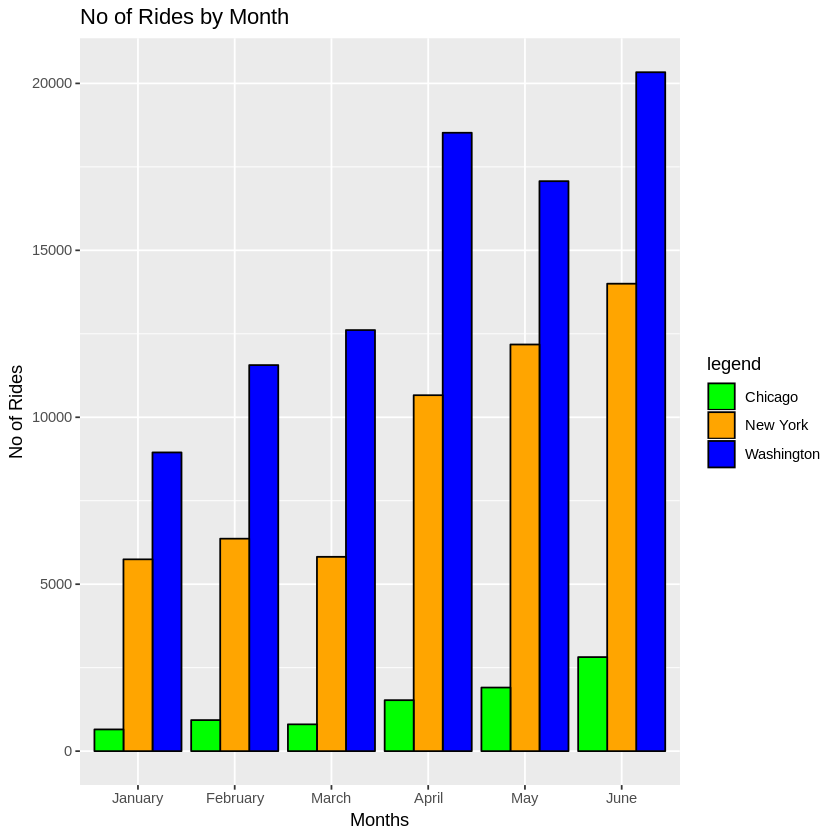

In [15]:
#visualizing data to show number of rides per month
bikeshare_clean %>%
  drop_na(Start.month) %>%
 ggplot(aes(x = Start.month, fill = City)) +
    geom_bar(position = 'dodge', colour="black") +
   labs(title = "No of Rides by Month") +
  xlab("Months") + 
  ylab("No of Rides") +
   scale_fill_manual("legend", values = c("Chicago" = "green", "New York" = "orange", "Washington" = "blue"))

**The most bikes are rented in the month of June. From the chart, we also see Washington city has the highest number of bikes rented from January all through to June.
In June alone, a total of 37,151 bikes were rented.**

### User Info

**Question 2: What are the counts of each user_type?**

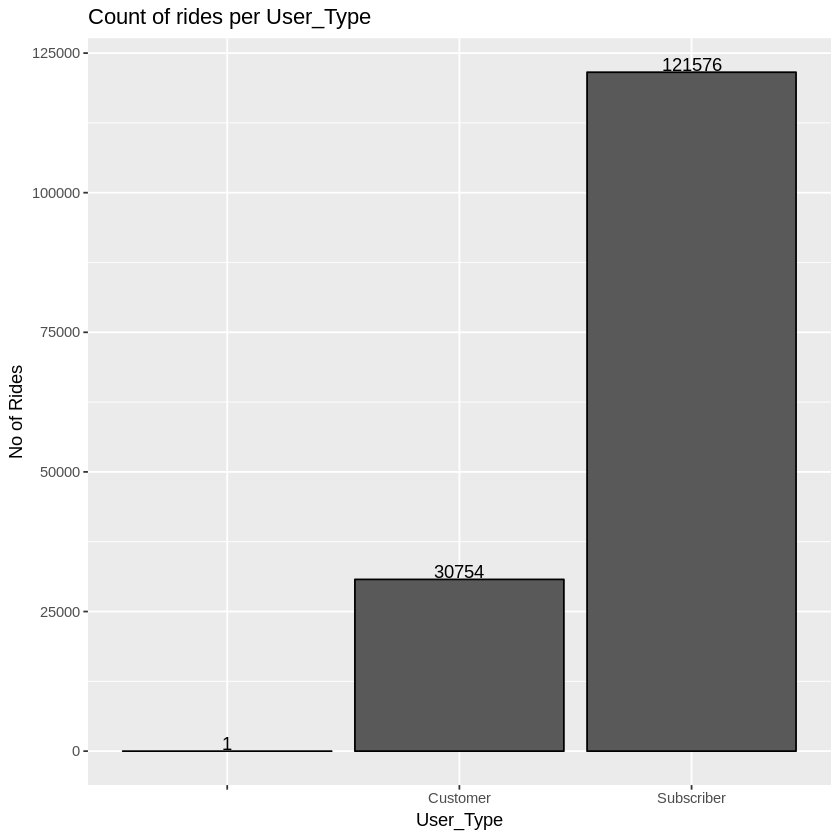

In [20]:
#visualization to show number of rides by each specific user type
bikeshare_clean %>%
  drop_na(User.Type) %>%
 ggplot(aes(x = User.Type)) +
    geom_bar(position = 'dodge', colour="black") +
   geom_text(stat = "count", aes(label= ..count..), position = position_dodge(width = 0.9), vjust=-0.1) +
   labs(title = "Count of rides per User_Type") +
  xlab("User_Type") + 
  ylab("No of Rides")

**Subscribers are more than customers. There is a total of 121,576 subscribers while only 30,754 customers.**

**Question 3: What are the counts of each Gender (only available in NYC & Chicago)**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

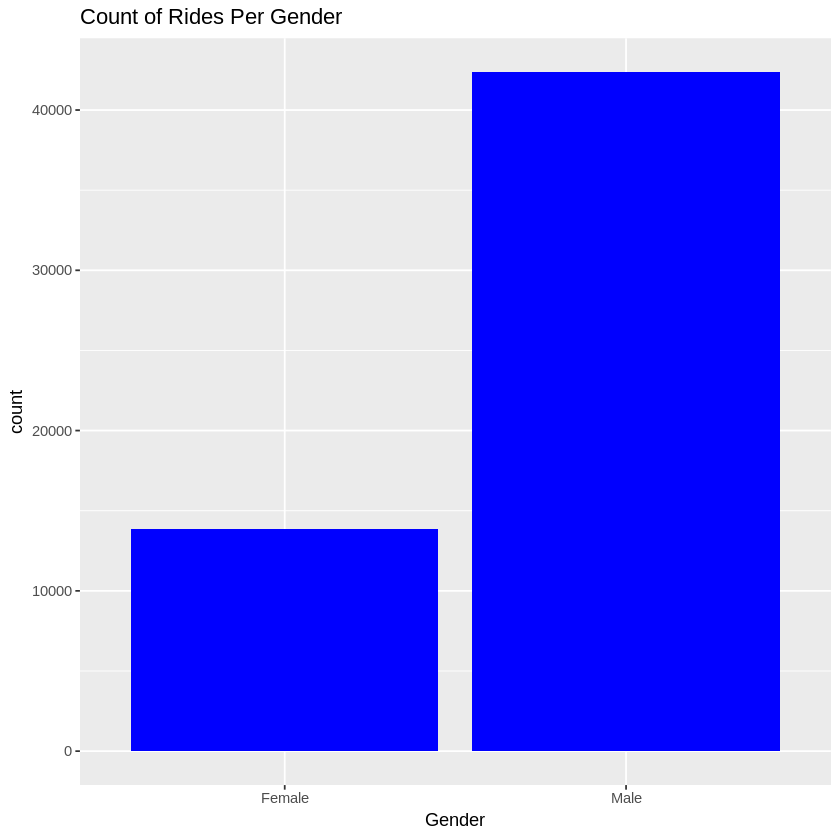

In [17]:
ggplot(aes(x=Gender), data=subset(bikeshare_clean, !is.na(Gender))) +
  geom_histogram(stat = "count", fill = "blue") + 
  ggtitle('Count of Rides Per Gender') +
  labs(x = "Gender")

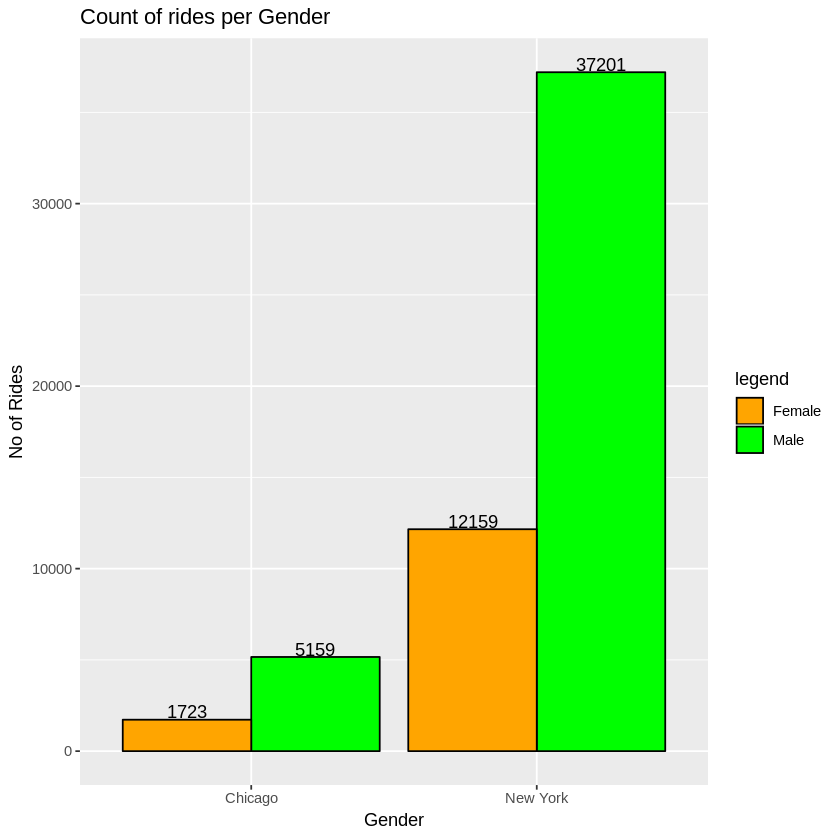

In [18]:
bikeshare_clean %>%
  drop_na(Gender) %>%
 ggplot(aes(x = City, fill = Gender)) +
    geom_bar(position = 'dodge', colour="black") +
   geom_text(stat = "count", aes(label= ..count..), position = position_dodge(width = 0.9), vjust=-0.1) +
   labs(title = "Count of rides per Gender") +
  xlab("Gender") + 
  ylab("No of Rides") +
   scale_fill_manual("legend", values = c("Male" = "green", "Female" = "orange"))

**Males(42,360) rent more bikes than females(13,882) generally as seen in both cities. 
In Chicago, 5159 males compared to 1723 female renting bikes while
In New York, 37201 males compared to 12,159 females.**

In [21]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')